In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,cohen_kappa_score
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression



In [2]:
data = pd.read_excel('assignment2_data.xlsx')
data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


In [3]:
df  = data

In [4]:
df.shape

(1000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [23]:
df.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

In [6]:
## NO null values

([<matplotlib.patches.Wedge at 0x2031b3f42b0>,
 [Text(-0.6465637441936393, 0.8899187180267096, 'Non-Deafulters'),
  Text(0.6465637441936392, -0.8899187180267097, 'Defauters')],
 [Text(-0.3526711331965305, 0.4854102098327506, '70.00'),
  Text(0.3526711331965304, -0.48541020983275074, '30.00')])

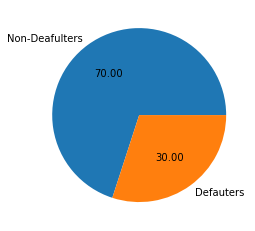

In [7]:
plt.pie(df['status'].value_counts(),normalize = True, labels = ['Non-Deafulters','Defauters'],autopct = '%.2f')

In [8]:
for i in df.columns :
    print(i,' ',df[i].dtype)
    if df[i].dtype == 'object':
        print(df[i].value_counts(normalize = True))

checkin_acc   object
A14    0.394
A11    0.274
A12    0.269
A13    0.063
Name: checkin_acc, dtype: float64
duration   int64
credit_history   object
A32    0.530
A34    0.293
A33    0.088
A31    0.049
A30    0.040
Name: credit_history, dtype: float64
purpose   object
A43     0.280
A40     0.234
A42     0.181
A41     0.103
A49     0.097
A46     0.050
A45     0.022
A44     0.012
A410    0.012
A48     0.009
Name: purpose, dtype: float64
amount   int64
svaing_acc   object
A61    0.603
A65    0.183
A62    0.103
A63    0.063
A64    0.048
Name: svaing_acc, dtype: float64
present_emp_since   object
A73    0.339
A75    0.253
A74    0.174
A72    0.172
A71    0.062
Name: present_emp_since, dtype: float64
inst_rate   int64
personal_status   object
A93    0.548
A92    0.310
A94    0.092
A91    0.050
Name: personal_status, dtype: float64
other_debtors   object
A101    0.907
A103    0.052
A102    0.041
Name: other_debtors, dtype: float64
residing_since   int64
property   object
A123    0.332
A121    0

In [9]:
df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

<AxesSubplot:xlabel='amount'>

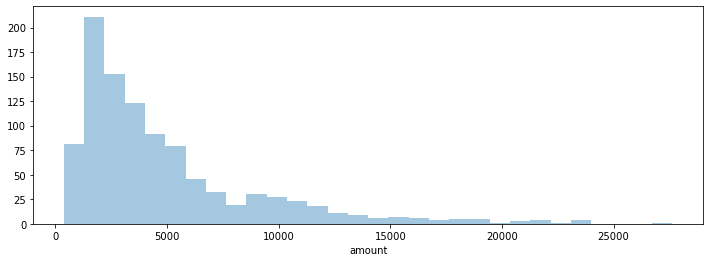

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(df['amount'],kde=False,bins=30)

In [12]:
## Here the major distribution of loan  amount lie between 1-10000

#### Finding dependency btw categorical variables and status 

##### ~Applying CHI_sq Contingency to see if  categorical varibles and status have some sort of dependence

In [20]:
df['status'] = df['status'].astype('object')

In [21]:
df_cat = df.select_dtypes(include = 'object')
df_cat.head()

,checkin_acc,credit_history,purpose,svaing_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker,status
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201,1
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201,2
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201,1
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201,1
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201,2


In [22]:
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
## null - hypo is the variables are independent
## alternate - hypo is the variables are independent
## let alpha = 0.05(we are 95 percent confident about our inferences)

In [23]:
df_cat.head(2)

,checkin_acc,credit_history,purpose,svaing_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker,status
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201,1
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201,2


In [24]:
l = []
for i in df_cat.drop(columns = 'status').columns:
    df_c = pd.crosstab(df_cat[i],df_cat['status'])
    obs = df_c.values
    n = df[i].nunique()
    k = 1
    chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = (n-1)*k), 4))
    
    test_stat, p, dof, expected_value = chi2_contingency(observed = obs, correction = False)
    if p> 0.05 and test_stat<chi2_val:
        print('We fail to Reject Null Hypothesis ie ',i,' and status are independent')
    else:
        print('we reject null hypo is ',i,' and status are dependent')
        l.append(i)

    
                       
   

we reject null hypo is  checkin_acc  and status are dependent
we reject null hypo is  credit_history  and status are dependent
we reject null hypo is  purpose  and status are dependent
we reject null hypo is  svaing_acc  and status are dependent
we reject null hypo is  present_emp_since  and status are dependent
we reject null hypo is  personal_status  and status are dependent
we reject null hypo is  other_debtors  and status are dependent
we reject null hypo is  property  and status are dependent
we reject null hypo is  inst_plans  and status are dependent
we reject null hypo is  housing  and status are dependent
We fail to Reject Null Hypothesis ie  job  and status are independent
We fail to Reject Null Hypothesis ie  telephone  and status are independent
we reject null hypo is  foreign_worker  and status are dependent


In [25]:
print('These variables with 95%  confidence have an influence for an individual to default ',l)

These variables with 95%  confidence have an influence for an individual to default  ['checkin_acc', 'credit_history', 'purpose', 'svaing_acc', 'present_emp_since', 'personal_status', 'other_debtors', 'property', 'inst_plans', 'housing', 'foreign_worker']


In [45]:
#### Finding Correlation btw numerical columns

In [26]:
df_num = df.select_dtypes(include = np.number)
df_num.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents
0,9,1754,6,6,101,3,2
1,72,8927,3,3,33,2,2
2,18,3144,3,5,74,2,3
3,63,11823,3,6,68,2,3
4,36,7305,5,6,80,3,3


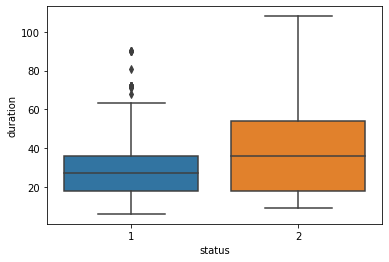

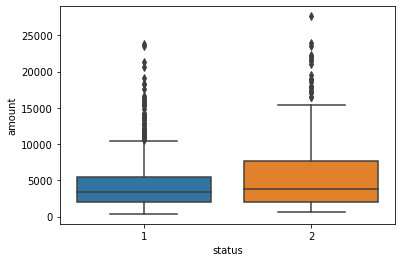

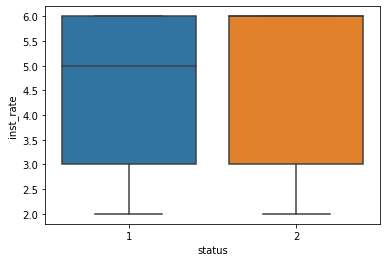

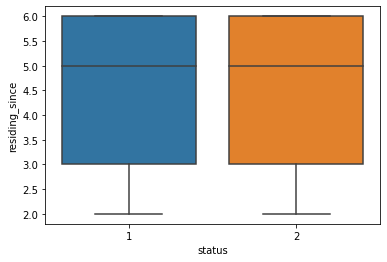

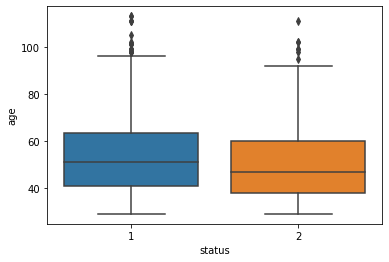

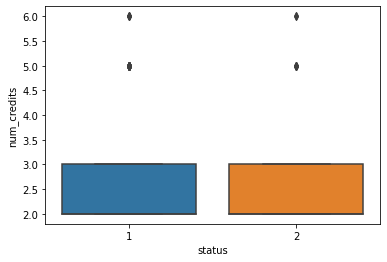

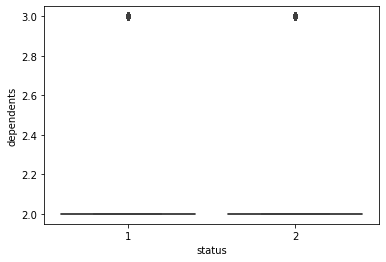

In [27]:
for i in df_num.columns:
    sns.boxplot(df_cat['status'],df_num[i])
    plt.show()

In [ ]:
## From the above boxplot we can see amount and the duration has impact in defaulting the loan

In [28]:
df_ad = df[['amount','duration','status']]

Text(0, 0.5, 'Amount')

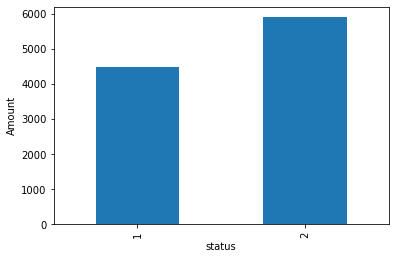

In [58]:
df_ad.groupby('status')['amount'].mean().plot(kind = 'bar')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

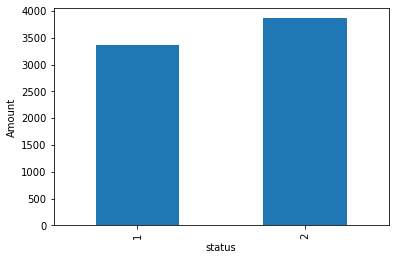

In [61]:
df_ad.groupby('status')['amount'].median().plot(kind = 'bar')
plt.ylabel('Amount')

##### FRom the above bar plots with and without taking the outliers into consideration , a person taking larger loan amount is more likely to default

Text(0, 0.5, 'Duration')

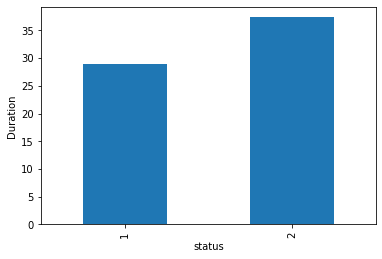

In [63]:
df_ad.groupby('status')['duration'].mean().plot(kind = 'bar')
plt.ylabel('Duration')

Text(0, 0.5, 'Duration')

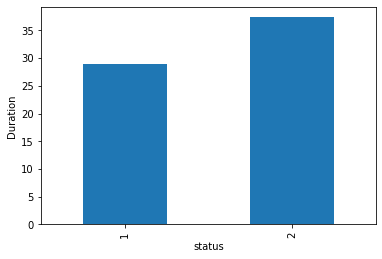

In [64]:
df_ad.groupby('status')['duration'].mean().plot(kind = 'bar')
plt.ylabel('Duration')

##### Similarly,from the above bar plots with and without taking the outliers into consideration , a person taking  larger loan for longer duration is more likely to default

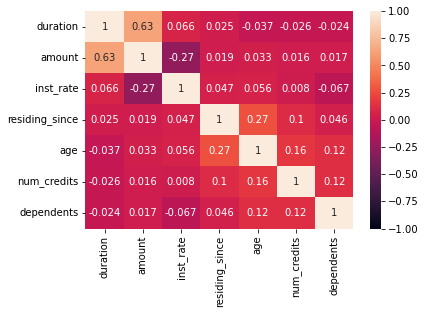

In [70]:
sns.heatmap(df.corr(),annot = True,vmin = -1,vmax = +1)
plt.show()

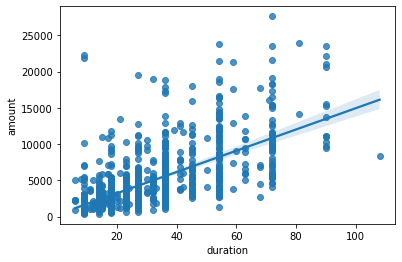

In [71]:
sns.regplot(df_num['duration'],df_num['amount']) ## positive correlation as expected 
plt.show()

In [72]:
##1 None of the numberic features(individually) seem to have any correlation with status columns
## (ie defaulting or not defaulting), However, there could be combined influence on our status column

##2 cannot proceed with PCA (no -high correlation can be seen within the independent features)

1.094408737916819


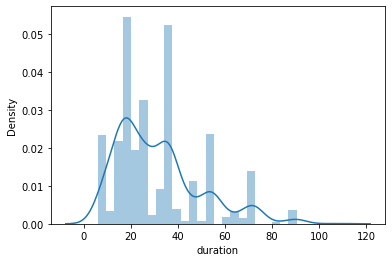

1.949622057818463


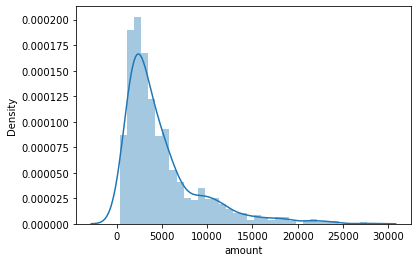

-0.533091784787296


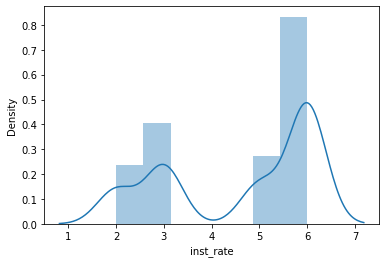

-0.2513106630362221


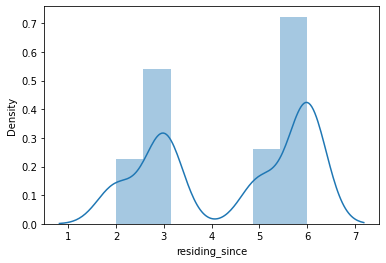

1.0201622094283025


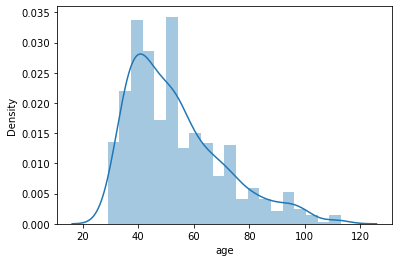

2.194441013078224


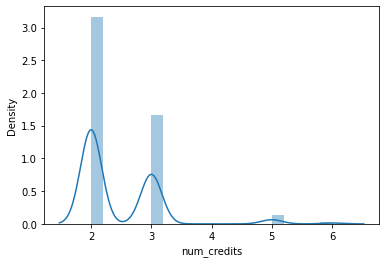

1.9094447212974863


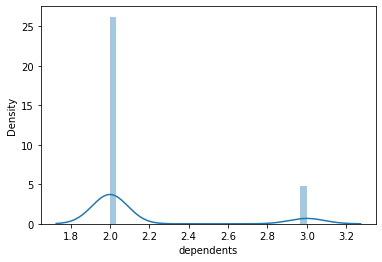

In [73]:
for i in df_num.columns:
    print(df_num[i].skew())
    sns.distplot(df_num[i])
    plt.show()


In [74]:
## no to slight skewness can be seen therfore transformations  can be omitted

##### One hot Encoding of the Categorical variables

In [76]:
df_cat = pd.get_dummies(data = df_cat,columns = df_cat.drop(columns = 'status').columns ,drop_first = True)

In [77]:
df_cat.head()

,status,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,2,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [78]:
df_num.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents
0,9,1754,6,6,101,3,2
1,72,8927,3,3,33,2,2
2,18,3144,3,5,74,2,3
3,63,11823,3,6,68,2,3
4,36,7305,5,6,80,3,3


In [79]:
df_new = pd.concat([df_cat,df_num],1)

In [80]:
df_new.head()

,status,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,...,job_A174,telephone_A192,foreign_worker_A202,duration,amount,inst_rate,residing_since,age,num_credits,dependents
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,9,1754,6,6,101,3,2
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0,72,8927,3,3,33,2,2
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,18,3144,3,5,74,2,3
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,63,11823,3,6,68,2,3
4,2,0,0,0,0,0,1,0,0,0,...,0,0,0,36,7305,5,6,80,3,3


In [82]:
x = df_new.drop(columns = ['status'])
y = df_new.status

In [83]:
y = y.astype(int)

In [84]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 123,stratify = y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((700, 48), (300, 48), (700,), (300,))

#####  Scaling the numerical variables after splitting into train and test , because test data has to be completely unseen to the trained model.

In [86]:
from sklearn.preprocessing import MinMaxScaler
MM  = MinMaxScaler()

In [87]:
xtrain_s = pd.DataFrame(MM.fit_transform(xtrain),columns = xtrain.columns)
xtrain_s.head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,...,job_A174,telephone_A192,foreign_worker_A202,duration,amount,inst_rate,residing_since,age,num_credits,dependents
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.178790,0.75,0.25,0.178571,0.25,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.142857,0.092733,1.00,1.00,0.428571,0.75,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.250000,0.110011,1.00,0.75,0.190476,0.00,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.142857,0.149628,1.00,0.75,0.107143,0.25,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.107143,0.053666,0.25,0.25,0.321429,0.00,0.0


In [88]:
xtest_s = pd.DataFrame(MM.fit_transform(xtest),columns = xtest.columns)
xtest_s.head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,...,job_A174,telephone_A192,foreign_worker_A202,duration,amount,inst_rate,residing_since,age,num_credits,dependents
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.343137,0.200391,0.75,0.25,0.135802,0.00,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.294118,0.329135,0.25,1.00,0.111111,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.029412,0.037270,0.00,1.00,0.358025,0.25,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.294118,0.028165,1.00,1.00,0.629630,0.25,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.205882,0.061479,1.00,1.00,0.765432,0.00,0.0


In [111]:
## Creating a score card to evaluate all the model performances
score_card = pd.DataFrame(columns = ['Model name','Accuracy','F1-Score','Cohen-Kappa'])
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa


In [112]:
def plot_metrics(xtest,ytest,model):
    ypred = model.predict(xtest)
    print('Classification Report ')
    print(classification_report(ytest,ypred))
    print('    Consision Matrix    ')
    cm = confusion_matrix(ytest, ypred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:2'], index = ['Actual:1','Actual:2'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
    print()
    print('Cohen Kappa Score is ',cohen_kappa_score(ytest,ypred))
   

Classification Report 
              precision    recall  f1-score   support

           1       0.77      0.75      0.76       210
           2       0.45      0.47      0.46        90

    accuracy                           0.67       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.67      0.67      0.67       300

    Consision Matrix    


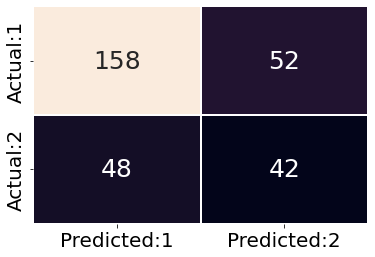


Cohen Kappa Score is  0.2163009404388715


In [113]:
DC = DecisionTreeClassifier(random_state = 1)
DC_mod = DC.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,DC_mod)

In [114]:
ypred_dc = DC_mod.predict(xtest_s)
s = pd.Series({'Model name': 'Decision Tree without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_dc),2),'F1-Score': np.round(f1_score(ytest,ypred_dc),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_dc),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Decision Tree without tuning,0.67,0.76,0.22


Classification Report 
              precision    recall  f1-score   support

           1       0.77      0.92      0.84       210
           2       0.65      0.36      0.46        90

    accuracy                           0.75       300
   macro avg       0.71      0.64      0.65       300
weighted avg       0.73      0.75      0.72       300

    Consision Matrix    


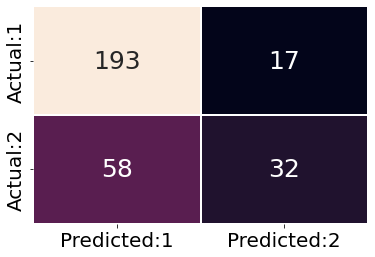


Cohen Kappa Score is  0.3156934306569342


In [115]:
RF = RandomForestClassifier()
RF_mod = RF.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,RF_mod)

In [116]:
ypred_rf = RF_mod.predict(xtest_s)
s = pd.Series({'Model name': 'Random Sampling without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_rf),2),'F1-Score': np.round(f1_score(ytest,ypred_rf),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_rf),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Decision Tree without tuning,0.67,0.76,0.22
1,Random Sampling without tuning,0.75,0.84,0.32


Classification Report 
              precision    recall  f1-score   support

           1       0.78      0.86      0.81       210
           2       0.56      0.42      0.48        90

    accuracy                           0.73       300
   macro avg       0.67      0.64      0.65       300
weighted avg       0.71      0.73      0.71       300

    Consision Matrix    


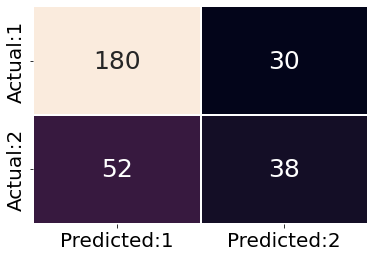


Cohen Kappa Score is  0.30034129692832756


In [117]:
AD = AdaBoostClassifier()
AD_mod = AD.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,AD_mod)

In [118]:
ypred_ad = AD_mod.predict(xtest_s)
s = pd.Series({'Model name': 'ADA Boost  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_ad),2),'F1-Score': np.round(f1_score(ytest,ypred_ad),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_ad),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Decision Tree without tuning,0.67,0.76,0.22
1,Random Sampling without tuning,0.75,0.84,0.32
2,ADA Boost without tuning,0.73,0.81,0.30


Classification Report 
              precision    recall  f1-score   support

           1       0.77      0.89      0.82       210
           2       0.58      0.37      0.45        90

    accuracy                           0.73       300
   macro avg       0.67      0.63      0.64       300
weighted avg       0.71      0.73      0.71       300

    Consision Matrix    


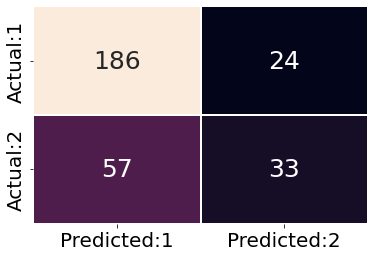


Cohen Kappa Score is  0.2819148936170214


In [119]:
GB = GradientBoostingClassifier()
GB_mod = GB.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,GB_mod)


In [120]:
ypred_gb = GB_mod.predict(xtest_s)
s = pd.Series({'Model name': 'Gradient  Boost  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_gb),2),'F1-Score': np.round(f1_score(ytest,ypred_gb),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_gb),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Decision Tree without tuning,0.67,0.76,0.22
1,Random Sampling without tuning,0.75,0.84,0.32
2,ADA Boost without tuning,0.73,0.81,0.30
3,Gradient Boost without tuning,0.73,0.82,0.28


[16:11:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report 
              precision    recall  f1-score   support

           1       0.80      0.86      0.83       210
           2       0.61      0.50      0.55        90

    accuracy                           0.75       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.74      0.75      0.75       300

    Consision Matrix    


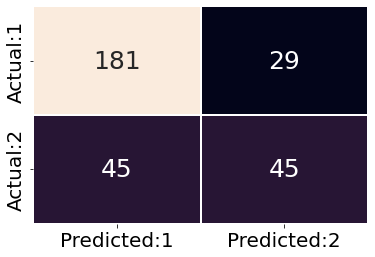


Cohen Kappa Score is  0.3812709030100334


In [121]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
XG_mod = xgb_cl.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,XG_mod)


In [122]:
ypred_xg = XG_mod.predict(xtest_s)
s = pd.Series({'Model name': 'Extreme Gradient Boost  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_xg),2),'F1-Score': np.round(f1_score(ytest,ypred_xg),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_xg),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Decision Tree without tuning,0.67,0.76,0.22
1,Random Sampling without tuning,0.75,0.84,0.32
2,ADA Boost without tuning,0.73,0.81,0.30
3,Gradient Boost without tuning,0.73,0.82,0.28
4,Extreme Gradient Boost without tuning,0.75,0.83,0.38


#### The f1-score for 2 (ie status = 2,defaulters ) has really been very low is less than 48% , This is majorly because the dataset is hugely imbalanced.We can overcome this by using either one of three techniques(Upsampling,Downsampimg,SMOTE).Lets try all the three and obtain the model that would predict the defaulters to decent percentage.

In [124]:
df_new.shape

(1000, 49)

In [125]:
df_new['status'].value_counts()

1    700
2    300
Name: status, dtype: int64

#### Downsampling the majority class 

In [126]:
df_1 = df_new[df_new['status']==1].sample(500)
df_2 = df_new[df_new['status']==2]

In [127]:
df_1.shape,df_2.shape

((500, 49), (300, 49))

In [128]:
df_down = pd.concat([df_1,df_2],axis = 0,keys= df_1.columns ,ignore_index = True )

In [129]:
df_down.shape

(800, 49)

In [130]:
x = df_down.drop(columns = ['status'])
y = df_down.status


In [131]:
y = y.astype('int')

In [132]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 123,stratify = y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((560, 48), (240, 48), (560,), (240,))

In [133]:
xtrain_s = pd.DataFrame(MM.fit_transform(xtrain),columns = xtrain.columns)
xtrain_s.head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,...,job_A174,telephone_A192,foreign_worker_A202,duration,amount,inst_rate,residing_since,age,num_credits,dependents
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.117647,0.102344,1.00,1.00,0.583333,0.00,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.294118,0.304607,1.00,0.25,0.142857,0.25,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.117647,0.092976,1.00,0.25,0.214286,0.25,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.117647,0.061568,1.00,1.00,0.500000,0.75,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.078431,0.025861,0.75,0.25,0.154762,0.00,0.0


In [134]:
xtest_s = pd.DataFrame(MM.fit_transform(xtest),columns = xtest.columns)
xtest_s.head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,...,job_A174,telephone_A192,foreign_worker_A202,duration,amount,inst_rate,residing_since,age,num_credits,dependents
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.464286,0.261112,0.25,0.25,0.121951,0.25,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.142857,0.044752,1.00,0.25,0.158537,0.75,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.571429,0.446483,0.25,1.00,0.073171,0.25,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.309524,0.220861,0.25,0.75,0.146341,0.25,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.785714,0.422506,0.75,0.25,0.219512,0.00,0.0


Classification Report 
              precision    recall  f1-score   support

           1       0.76      0.75      0.76       150
           2       0.60      0.61      0.60        90

    accuracy                           0.70       240
   macro avg       0.68      0.68      0.68       240
weighted avg       0.70      0.70      0.70       240

    Consision Matrix    


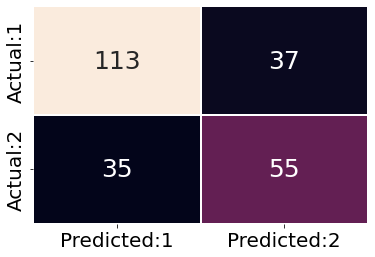


Cohen Kappa Score is  0.36283185840707965


In [135]:
RF = RandomForestClassifier()
RF_mod = RF.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,RF_mod)

[16:16:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report 
              precision    recall  f1-score   support

           1       0.74      0.73      0.73       150
           2       0.55      0.57      0.56        90

    accuracy                           0.67       240
   macro avg       0.65      0.65      0.65       240
weighted avg       0.67      0.67      0.67       240

    Consision Matrix    


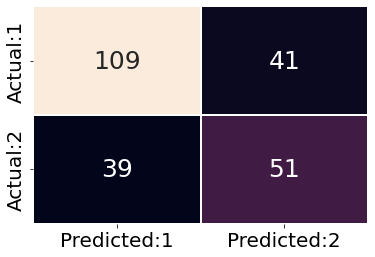


Cohen Kappa Score is  0.2920353982300885


In [136]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
XG_mod = xgb_cl.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,XG_mod)


Classification Report 
              precision    recall  f1-score   support

           1       0.73      0.73      0.73       150
           2       0.55      0.56      0.55        90

    accuracy                           0.66       240
   macro avg       0.64      0.64      0.64       240
weighted avg       0.66      0.66      0.66       240

    Consision Matrix    


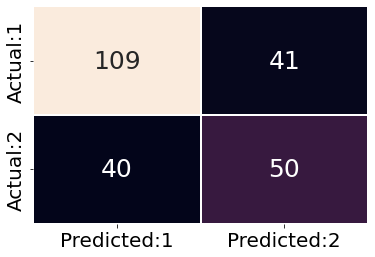


Cohen Kappa Score is  0.28159645232815966


In [137]:
DC = DecisionTreeClassifier(random_state = 1)
DC_mod = DC.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,DC_mod)

In [ ]:
## So far XGBOOST is giving the maximum f1-score of 56% for 2(ie defaulters)


#### Upsampling the minority class

In [138]:
df_1 = df_new[df_new['status']==1]
df_2 = df_new[df_new['status']==2].sample(500,replace = True)

In [139]:
df_up = pd.concat([df_1,df_2],axis = 0,keys = df_1.columns,ignore_index = True)

In [140]:
df_up.shape

(1200, 49)

In [141]:
df_up.head()

,status,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,...,job_A174,telephone_A192,foreign_worker_A202,duration,amount,inst_rate,residing_since,age,num_credits,dependents
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,9,1754,6,6,101,3,2
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,18,3144,3,5,74,2,3
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,63,11823,3,6,68,2,3
3,1,0,0,1,0,1,0,0,0,0,...,0,1,0,54,13583,3,6,53,2,3
4,1,0,0,1,0,1,0,0,0,0,...,0,0,0,36,4253,5,6,80,2,2


In [142]:
x = df_up.drop(columns = ['status'])
y = df_up.status
y = y.astype('int')
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 123,stratify = y)
xtrain_s = pd.DataFrame(MM.fit_transform(xtrain),columns = xtrain.columns)
xtest_s = pd.DataFrame(MM.fit_transform(xtest),columns = xtest.columns)


[16:17:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report 
              precision    recall  f1-score   support

           1       0.84      0.79      0.82       210
           2       0.73      0.79      0.76       150

    accuracy                           0.79       360
   macro avg       0.79      0.79      0.79       360
weighted avg       0.80      0.79      0.79       360

    Consision Matrix    


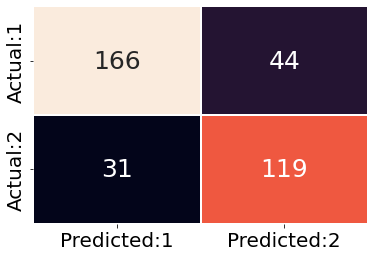


Cohen Kappa Score is  0.5766698024459078


In [143]:
xgb_cl = xgb.XGBClassifier()
XG_mod = xgb_cl.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,XG_mod)


Classification Report 
              precision    recall  f1-score   support

           1       0.83      0.86      0.85       210
           2       0.80      0.75      0.77       150

    accuracy                           0.82       360
   macro avg       0.81      0.81      0.81       360
weighted avg       0.82      0.82      0.82       360

    Consision Matrix    


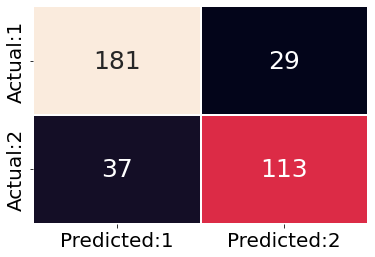


Cohen Kappa Score is  0.6199616122840691


In [144]:
RF = RandomForestClassifier()
RF_mod = RF.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,RF_mod)

#### Upsampling using SMOT

[16:18:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report 
              precision    recall  f1-score   support

           1       0.84      0.77      0.80       210
           2       0.71      0.79      0.75       150

    accuracy                           0.78       360
   macro avg       0.77      0.78      0.77       360
weighted avg       0.78      0.78      0.78       360

    Consision Matrix    


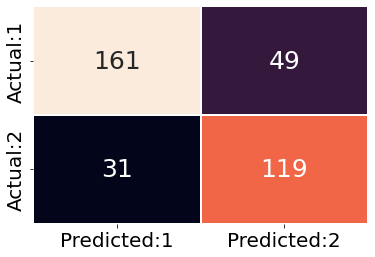


Cohen Kappa Score is  0.550561797752809


In [146]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27) 
X_final_sm, Y_final_sm = sm.fit_resample(xtrain_s, ytrain)  
smote_xgb =xgb.XGBClassifier().fit(X_final_sm, Y_final_sm)
plot_metrics(xtest_s,ytest,smote_xgb)


In [147]:
accuracy_2 = (132/(132+18))*100
accuracy_2

88.0

##### FINDING OUT THE IMPORTANT FEATURES 

In [175]:
imp_features = pd.DataFrame({'Features':xtrain_s.columns,
                            'Importances':smote_xgb.feature_importances_})
imp_features= imp_features.sort_values('Importances',ascending = False)
inpp = imp_features.head(20)

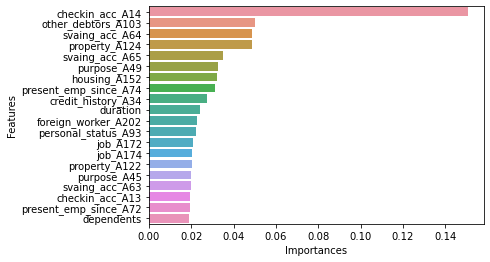

In [176]:
sns.barplot(data = inpp ,x = 'Importances',y = 'Features')
plt.show()

In [153]:
## The above are the top 20 features that have an influence in deciding the likelihood of a person to default

In [177]:
inpp

,Features,Importances
2,checkin_acc_A14,0.150534
28,other_debtors_A103,0.050055
18,svaing_acc_A64,0.048809
31,property_A124,0.048685
19,svaing_acc_A65,0.034874
15,purpose_A49,0.032449
34,housing_A152,0.031973
22,present_emp_since_A74,0.031329
6,credit_history_A34,0.027281
41,duration,0.023974


In [ ]:
### Further Analysis of these variables

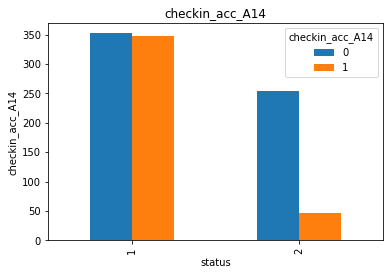

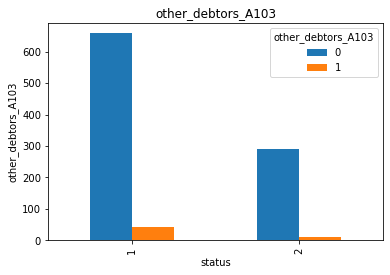

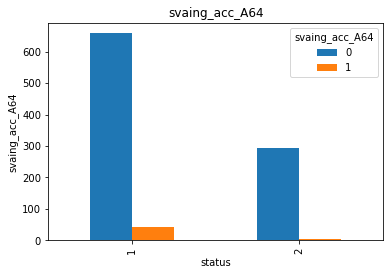

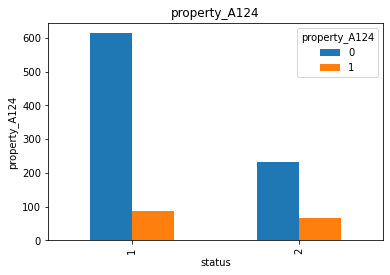

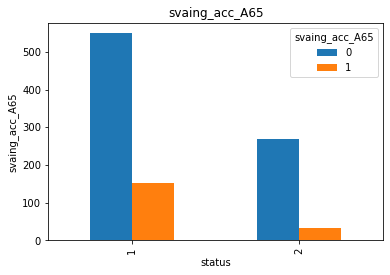

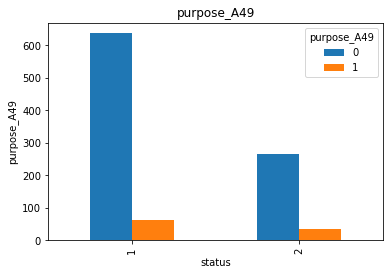

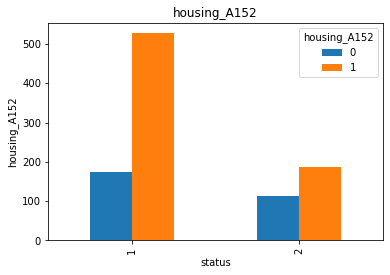

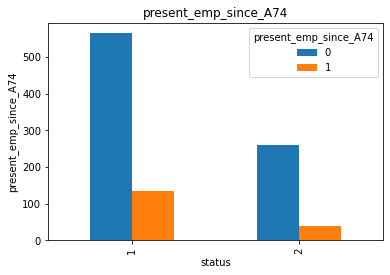

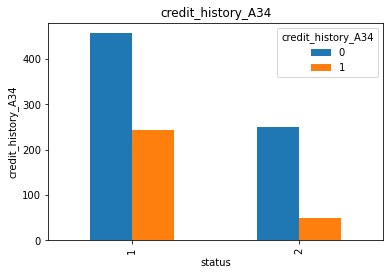

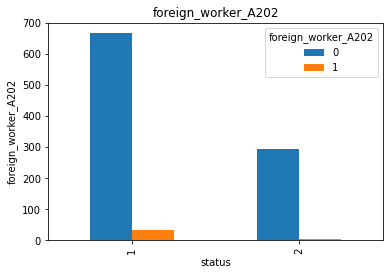

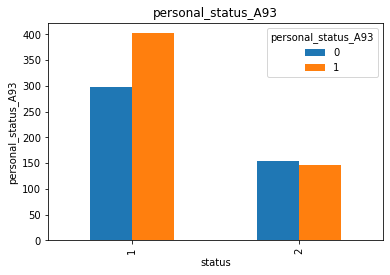

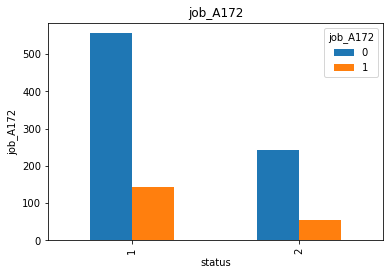

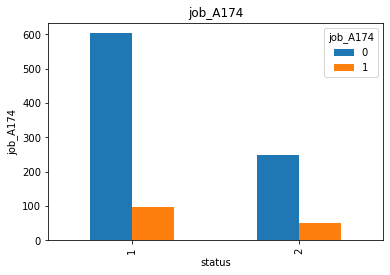

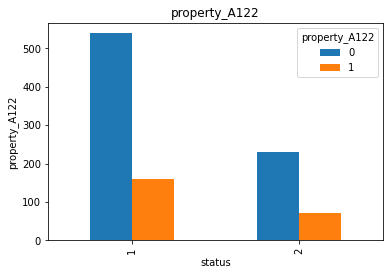

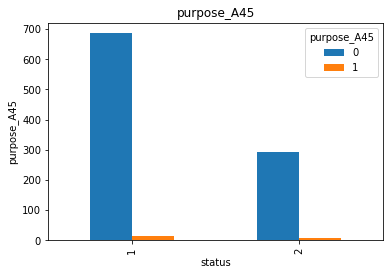

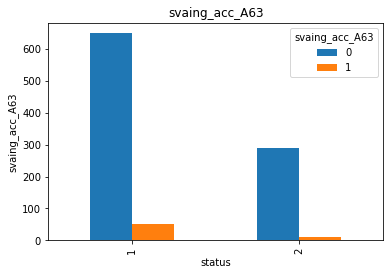

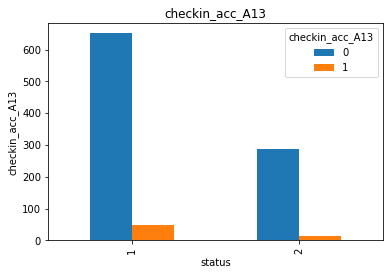

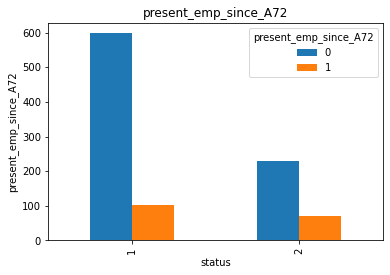

In [192]:
for i in inpp['Features'].unique():
    if df_new[i].dtype != 'int64':
        x = pd.crosstab(df_new['status'],df_new[i])
        x.plot(kind = 'bar')
        plt.xlabel('status')
        plt.ylabel(i)
        plt.title(i)
    

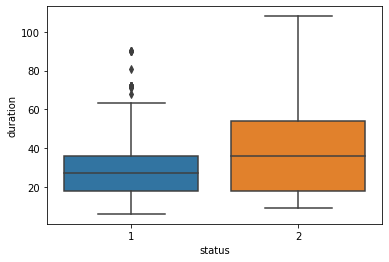

In [198]:
sns.boxplot(df['status'],df['duration'])
plt.show()